#### 1. Importing necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\joths\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### 2. Loading and understanding the dataset

##### 2.1 About Dataset
**Context**

In daily_avg_power Turbines, Scada Systems measure and save data's like wind speed, wind direction, generated power etc. for 10 minutes intervals. This file was taken from a wind turbine's scada system that is working and generating power in Turkey.

Date/Time (for 10 minutes intervals)

LV ActivePower (kW): The power generated by the turbine for that moment

Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)

Theoretical_Power_Curve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer

Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

In [3]:
wind=pd.read_csv('WIND.csv')
wind.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
print("The shape of the dataset is :",wind.shape)
samples=wind.shape[0]
attributes=wind.shape[1]

print("The dataset has {} samples".format(samples))
print("The dataset has {} attributes".format(attributes))


The shape of the dataset is : (50530, 5)
The dataset has 50530 samples
The dataset has 5 attributes


In [5]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


### 3. Data Preprocessing

##### 3.1 Here the data type of Date/Time is object which is not correct. Need to convert this to Date type

In [6]:
wind['Date/Time'] = pd.to_datetime(wind['Date/Time'], format="%d %m %Y %H:%M")

In [7]:
wind['Date/Time'].dtype

dtype('<M8[ns]')

##### 3.2 checking missing values

In [8]:
wind.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

##### There are no null values in the dataset

In [9]:
wind.describe()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530,50530.000000,50530.000000,50530.000000,50530.000000
mean,2018-07-01 20:01:30.065307648,1307.684332,7.557952,1492.175463,123.687559
min,2018-01-01 00:00:00,-2.471405,0.000000,0.000000,0.000000
25%,2018-04-03 05:22:30,50.677890,4.201395,161.328167,49.315437
50%,2018-06-30 16:15:00,825.838074,7.104594,1063.776283,73.712978
75%,2018-09-26 18:57:30,2482.507568,10.300020,2964.972462,201.696720
max,2018-12-31 23:50:00,3618.732910,25.206011,3600.000000,359.997589
std,NaN,1312.459242,4.227166,1368.018238,93.443736




**Date/Time:** The data covers the period from 2018-01-01 00:00:00 to 2018-12-31 23:50:00, spanning the entire year of 2018.

**LV ActivePower (kW):** 

Mean: 1307.684 kW
Min: -2.471 kW (possibly indicating power consumption during idle periods)
Max: 3618.733 kW


**Wind Speed (m/s):**

Mean: 7.558 m/s
Min: 0 m/s
Max: 25.206 m/s


**Theoretical_Power_Curve (KWh):** 

Mean: 1492.175 KWh
Min: 0 KWh
Max: 3600 KWh


**Wind Direction (°):**

Mean: 123.688°
Min: 0°
Max: 359.998°



**Some notable observations:**

The maximum wind speed recorded was quite high at 25.2 m/s, which is around 90 km/h or 56 mph.

There were times when the turbine(s) consumed a small amount of power (-2.471 kW), likely during very low wind conditions.

The maximum power output (3618.733 kW) is higher than the maximum theoretical power curve value (3600 KWh), which might indicate some overperformance or could be due to differences in measurement intervals.

This data could be useful for analyzing the performance of wind turbines, understanding the relationship between wind conditions and power generation, and potentially for forecasting future power output based on weather predictions.

##### 3.3 Feature Engineering

In [10]:
## Splitting Date and Time into separate features

wind['Date'] = wind['Date/Time'].dt.normalize()
wind['Time'] = wind['Date/Time'].dt.time
wind['Hour'] = wind['Date/Time'].dt.hour

# Drop the original Date/Time column if no longer needed
wind.drop(columns=['Date/Time'],axis=1,inplace=True)


In [11]:
wind.head(10)

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Date,Time,Hour
0,380.047791,5.311336,416.328908,259.994904,2018-01-01,00:00:00,0
1,453.769196,5.672167,519.917511,268.641113,2018-01-01,00:10:00,0
2,306.376587,5.216037,390.900016,272.564789,2018-01-01,00:20:00,0
3,419.645905,5.659674,516.127569,271.258087,2018-01-01,00:30:00,0
4,380.650696,5.577941,491.702972,265.674286,2018-01-01,00:40:00,0
5,402.391998,5.604052,499.436385,264.578613,2018-01-01,00:50:00,0
6,447.605713,5.793008,557.372363,266.163605,2018-01-01,01:00:00,1
7,387.242188,5.306050,414.898179,257.949493,2018-01-01,01:10:00,1
8,463.651215,5.584629,493.677652,253.480698,2018-01-01,01:20:00,1
9,439.725708,5.523228,475.706783,258.723785,2018-01-01,01:30:00,1


In [12]:
Houlry_avg_power = wind.groupby(['Date', 'Hour'])[['LV ActivePower (kW)','Theoretical_Power_Curve (KWh)','Wind Speed (m/s)','Wind Direction (°)']].mean().reset_index()




In [13]:
Houlry_avg_power.shape

(8439, 6)

In [14]:
Houlry_avg_power['Month']=Houlry_avg_power['Date'].dt.month

In [15]:
# Create lag features
Houlry_avg_power['Lag_1'] = Houlry_avg_power['LV ActivePower (kW)'].shift(1)
Houlry_avg_power['Lag_2'] = Houlry_avg_power['LV ActivePower (kW)'].shift(2)

In [16]:
Houlry_avg_power.head()

,Date,Hour,LV ActivePower (kW),Theoretical_Power_Curve (KWh),Wind Speed (m/s),Wind Direction (°),Month,Lag_1,Lag_2
0,2018-01-01,0,390.480362,472.402227,5.506868,267.118632,1,NaN,NaN
1,2018-01-01,1,460.537125,513.418408,5.644205,258.945546,1,390.480362,NaN
2,2018-01-01,2,733.655375,788.401310,6.452037,268.397466,1,460.537125,390.480362
3,2018-01-01,3,909.362081,948.793346,6.811455,256.014765,1,733.655375,460.537125
4,2018-01-01,4,1393.518188,1406.391795,7.748749,247.652468,1,909.362081,733.655375


#### Checking Outliers

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Houlry_avg_power['LV ActivePower (kW)'].quantile(0.25)
Q3 = Houlry_avg_power['LV ActivePower (kW)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = Houlry_avg_power[(Houlry_avg_power['LV ActivePower (kW)'] < lower_bound) | (Houlry_avg_power['LV ActivePower (kW)'] > upper_bound)]

print("Outliers:")
print(outliers)
print(lower_bound)
print(upper_bound)
print(IQR)
print(Q1)
print(Q3)

Outliers:
Empty DataFrame
Columns: [Date, Hour, LV ActivePower (kW), Theoretical_Power_Curve (KWh), Wind Speed (m/s), Wind Direction (°), Month, Lag_1, Lag_2]
Index: []
-3464.348441521323
5982.183544079457
2361.6329964001948
78.10105307896927
2439.7340494791642


### There are no outliers

### 4. Exploratory Data Analysis

**Line Plot of Average Daily Active Power**

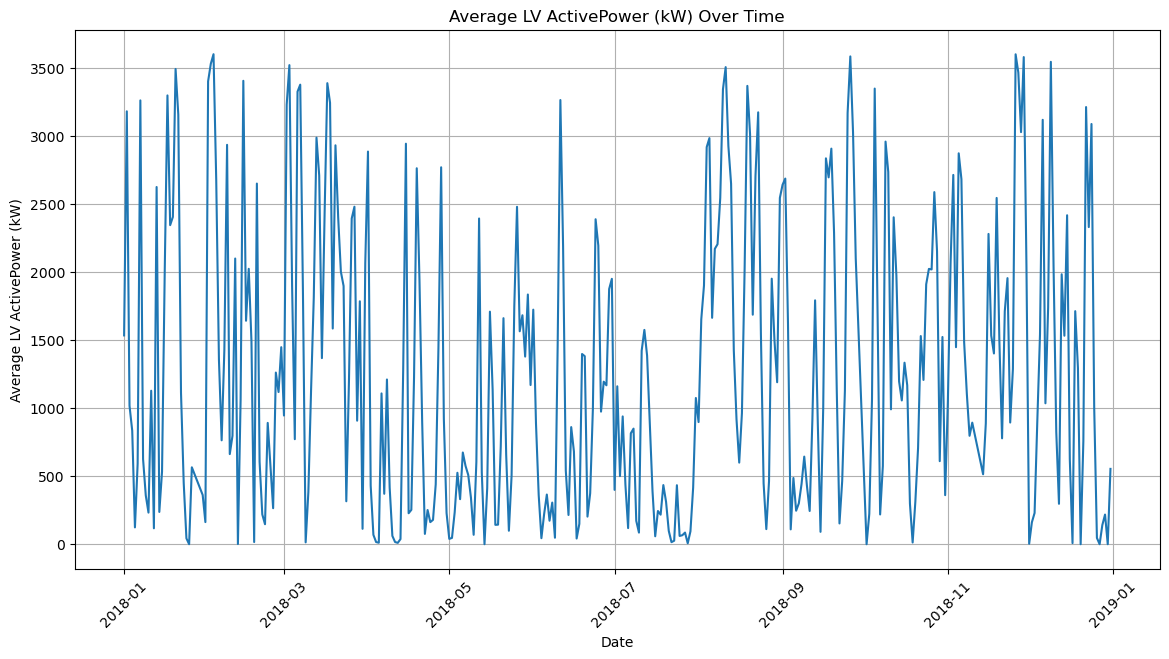

In [18]:

# Plot average daily LV ActivePower (kW)
daily_avg_power = wind.groupby('Date')['LV ActivePower (kW)'].mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(daily_avg_power['Date'], daily_avg_power['LV ActivePower (kW)'])
plt.xlabel('Date')
plt.ylabel('Average LV ActivePower (kW)')
plt.title('Average LV ActivePower (kW) Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Histogram of daily average wind speed**

c:\Users\joths\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


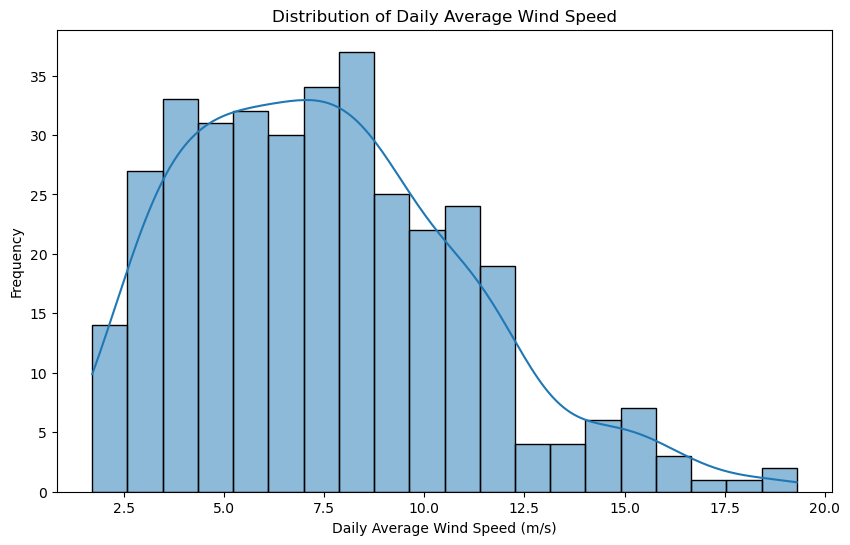

In [19]:

daily_avg_wind_speed = wind.groupby('Date')['Wind Speed (m/s)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(daily_avg_wind_speed['Wind Speed (m/s)'], bins=20, kde=True)
plt.xlabel('Daily Average Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Average Wind Speed')
plt.show()


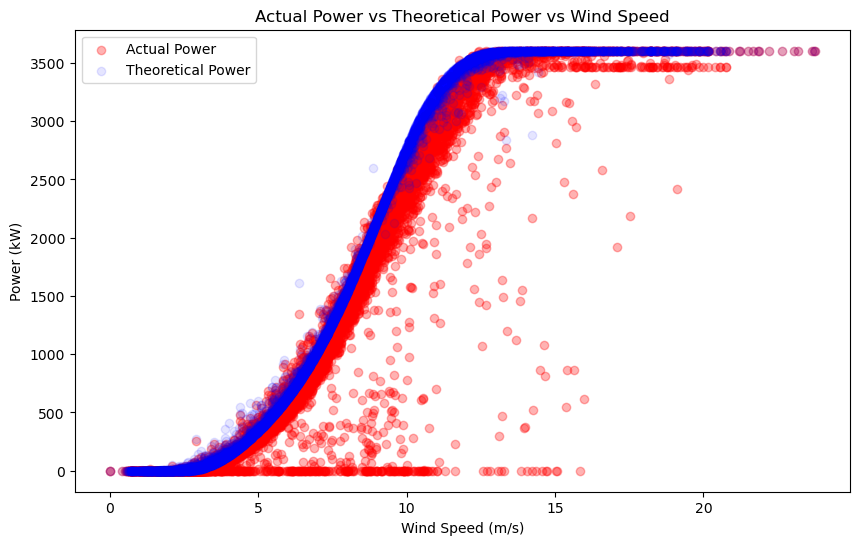

In [20]:
plt.figure(figsize=(10, 6))


# Scatter plot for actual power
plt.scatter(x='Wind Speed (m/s)', y='LV ActivePower (kW)', data=Houlry_avg_power,color='red', label='Actual Power',alpha=0.3)

# Scatter plot for theoretical power
plt.scatter(x='Wind Speed (m/s)', y='Theoretical_Power_Curve (KWh)', data=Houlry_avg_power, color='blue', label='Theoretical Power',alpha=0.1)

# Adding titles and labels
plt.title('Actual Power vs Theoretical Power vs Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')

# Show legend
plt.legend()

# Show plot
plt.show()

**Box Plot of Daily Average Active Power by Season**

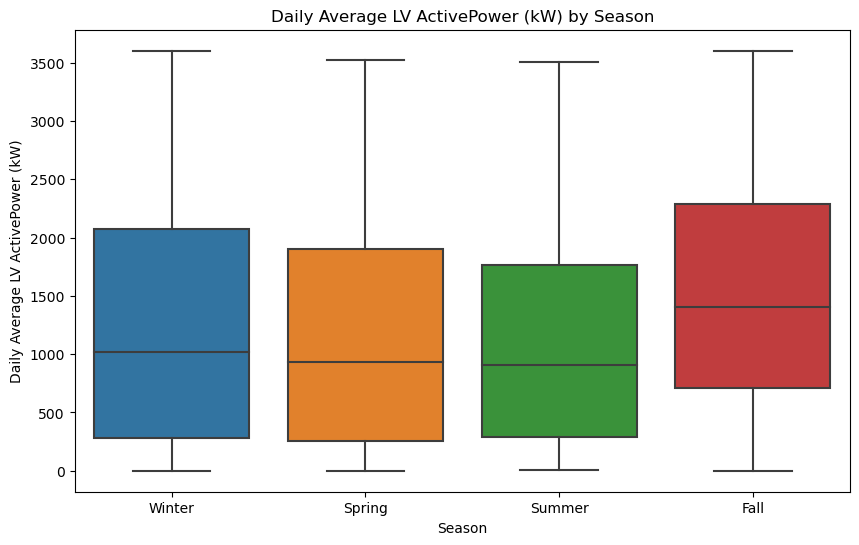

In [21]:
# Adding Season to daily_avg
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

daily_avg_power['Season'] = daily_avg_power['Date'].apply(get_season)

# Plot box plot of daily average active power by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='LV ActivePower (kW)', data=daily_avg_power)
plt.xlabel('Season')
plt.ylabel('Daily Average LV ActivePower (kW)')
plt.title('Daily Average LV ActivePower (kW) by Season')
plt.show()


**Heatmap of correlation matrix for daily averages**

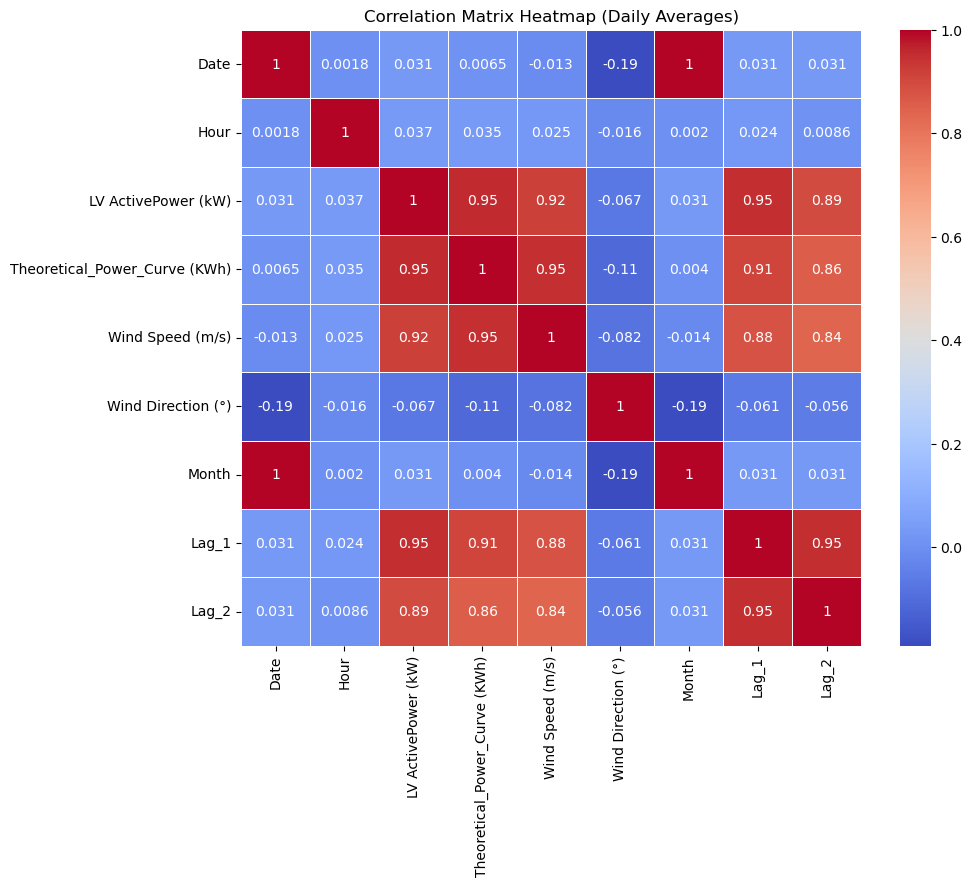

In [22]:


corr_matrix = Houlry_avg_power.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Daily Averages)')
plt.show()


In [23]:
Houlry_avg_power=Houlry_avg_power.dropna()

In [24]:
Houlry_avg_power.set_index('Date',inplace=True)

In [25]:
Houlry_avg_power.shape

(8437, 8)

In [26]:
Houlry_avg_power.head()

,Hour,LV ActivePower (kW),Theoretical_Power_Curve (KWh),Wind Speed (m/s),Wind Direction (°),Month,Lag_1,Lag_2
Date,,,,,,,,
2018-01-01,2,733.655375,788.401310,6.452037,268.397466,1,460.537125,390.480362
2018-01-01,3,909.362081,948.793346,6.811455,256.014765,1,733.655375,460.537125
2018-01-01,4,1393.518188,1406.391795,7.748749,247.652468,1,909.362081,733.655375
2018-01-01,5,1149.599162,1128.194441,7.236854,243.846349,1,1393.518188,909.362081
2018-01-01,6,1100.074392,1103.372815,7.183671,246.117401,1,1149.599162,1393.518188


- Now our data is all set to do predictions

In [27]:


from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

### 1. Linear Regression

In [28]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = Houlry_avg_power.drop(['LV ActivePower (kW)'], axis=1)
y = Houlry_avg_power['LV ActivePower (kW)']


In [29]:


# Train-Test Split
split_ratio = 0.8
split_index = int(len(Houlry_avg_power) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]




In [30]:
from sklearn.preprocessing import StandardScaler
# Initialize scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Convert Pandas Series to NumPy arrays and reshape
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)  # Reshape to 2D
y_test_np = y_test.to_numpy().reshape(-1, 1)    # Reshape to 2D

# Fit and transform the training features and target
X_train_scaled = scaler_X.fit_transform(X_train_np)
y_train_scaled = scaler_y.fit_transform(y_train_np).ravel()  # Flatten back to 1D

# Transform the testing features and target
X_test_scaled = scaler_X.transform(X_test_np)
y_test_scaled = scaler_y.transform(y_test_np).ravel()  # Flatten back to 1D

In [31]:
print(f"The train size is :  {len(X_train)}")
print(f"The test size is :  {len(X_test)}")

The train size is :  6749
The test size is :  1688


In [32]:

# Train the linear regression model
model_LR = LinearRegression()
model_LR.fit(X_train_scaled, y_train_scaled)

# Predict on training data
y_train_pred = model_LR.predict(X_train_scaled)
train_error = mean_squared_error(y_train_scaled, y_train_pred)




# Predict using the model
y_test_pred_scaled = model_LR.predict(X_test_scaled)



test_error = mean_squared_error(y_test_scaled, y_test_pred_scaled)

print(f"Training Error: {train_error}")
print(f"Testing Error: {test_error}")

Training Error: 0.049595626703707346
Testing Error: 0.055285938814498115


In [33]:
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

#### Evaluation Metrics

In [34]:

# Evaluate the model
LR_mae = round(mean_absolute_error(y_test_scaled, y_test_pred_scaled),2)
LR_mse = round(mean_squared_error(y_test_scaled, y_test_pred_scaled),2)
LR_r2 = round(r2_score(y_test_scaled, y_test_pred_scaled),2)
LR_rmse=round(np.sqrt(LR_mse),2)


print(f'R^2 Score of Linear Regression model is : {LR_r2}')
print(f'Root Mean Squared Error of Linear Regression model is : {LR_rmse}')
print(f'Mean Absolute error of Linear Regression Model is: {LR_mae}')
print(f'Mean Squared Error of Linear Regression model is: {LR_mse}')



R^2 Score of Linear Regression model is : 0.95
Root Mean Squared Error of Linear Regression model is : 0.24
Mean Absolute error of Linear Regression Model is: 0.14
Mean Squared Error of Linear Regression model is: 0.06


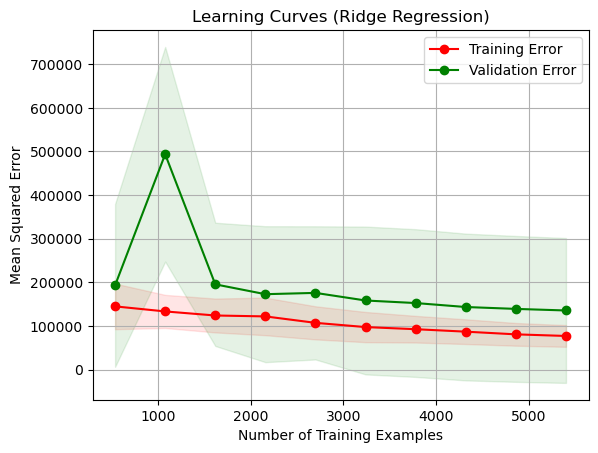

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming you have X_train, X_test, y_train, and y_test already defined
model = Ridge()

# Calculate learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_std = validation_scores.std(axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (Ridge Regression)")
plt.xlabel("Number of Training Examples")
plt.ylabel("Mean Squared Error")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Error")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation Error")

plt.legend(loc="best")
plt.show()


c:\Users\joths\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.19269e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\joths\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.86549e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\joths\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.19696e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\joths\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.36886e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


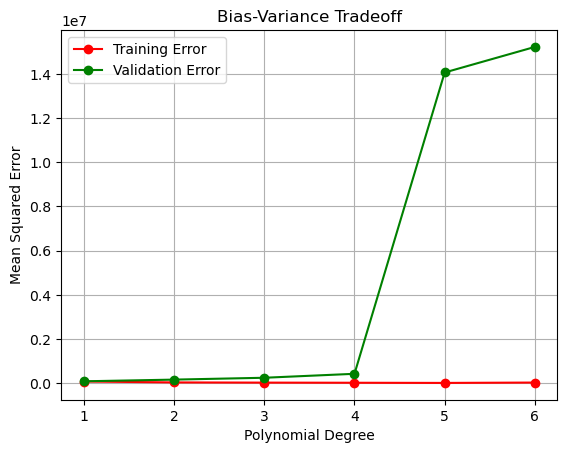

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Define the range of polynomial degrees to test
degrees = [1, 2, 3, 4, 5, 6]
train_errors = []
validation_errors = []

# Train and evaluate models with different polynomial degrees
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    validation_errors.append(mean_squared_error(y_test, y_val_pred))

# Plot bias-variance tradeoff
plt.figure()
plt.plot(degrees, train_errors, 'o-', color="r", label="Training Error")
plt.plot(degrees, validation_errors, 'o-', color="g", label="Validation Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff")
plt.legend(loc="best")
plt.grid()
plt.show()


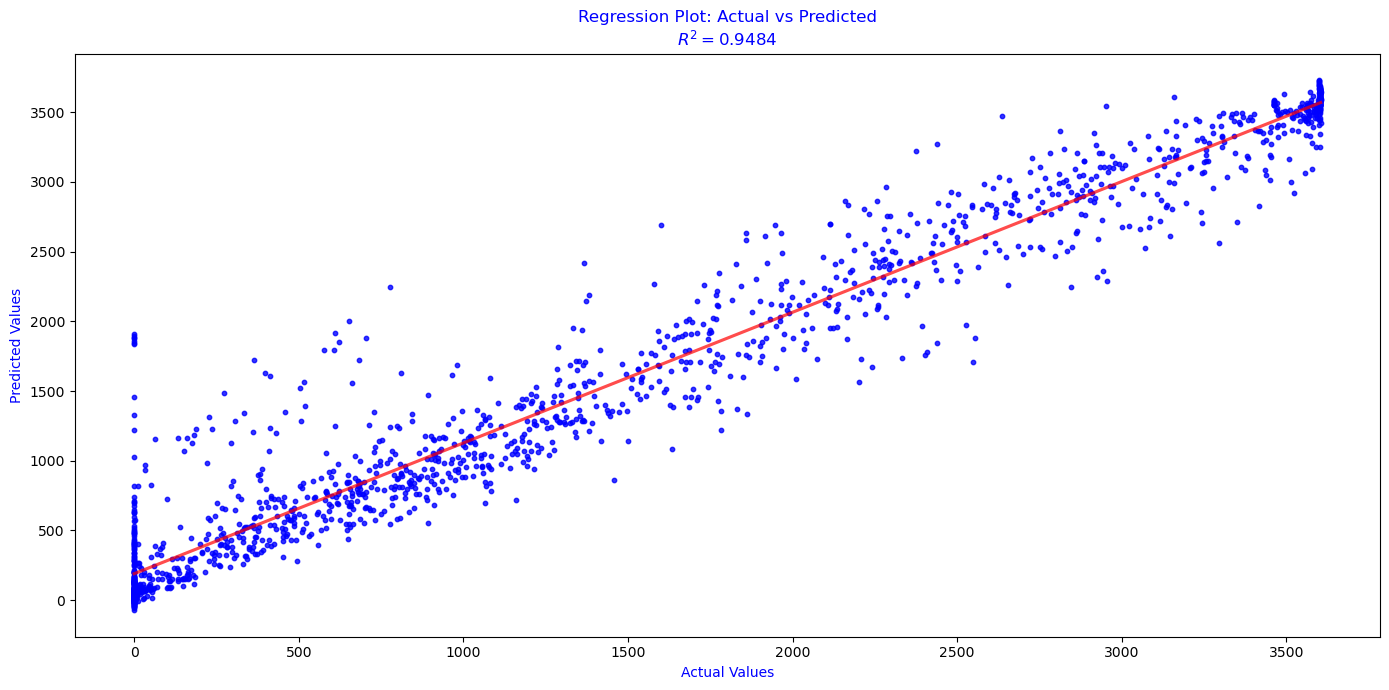

In [37]:


df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

# Calculate R^2 value
r2 = r2_score(y_test, y_test_pred)

plt.figure(figsize=(14, 7))

# Create the regression plot with star markers
sns.regplot(x='Actual', y='Predicted', data=df, ci=None, 
            scatter_kws={"color": "blue", "s": 10, "marker": "*"},  # Star markers
            line_kws={"color": "red", "alpha": 0.7})

# Add labels and title
plt.xlabel('Actual Values', color='blue')
plt.ylabel('Predicted Values', color='blue')
plt.title(f'Regression Plot: Actual vs Predicted\n$R^2 = {r2:.4f}$', color='blue')

plt.tight_layout()
plt.show()

In [38]:
type(y_test_pred)

numpy.ndarray

In [39]:
y_test_pred=pd.Series(y_test_pred)

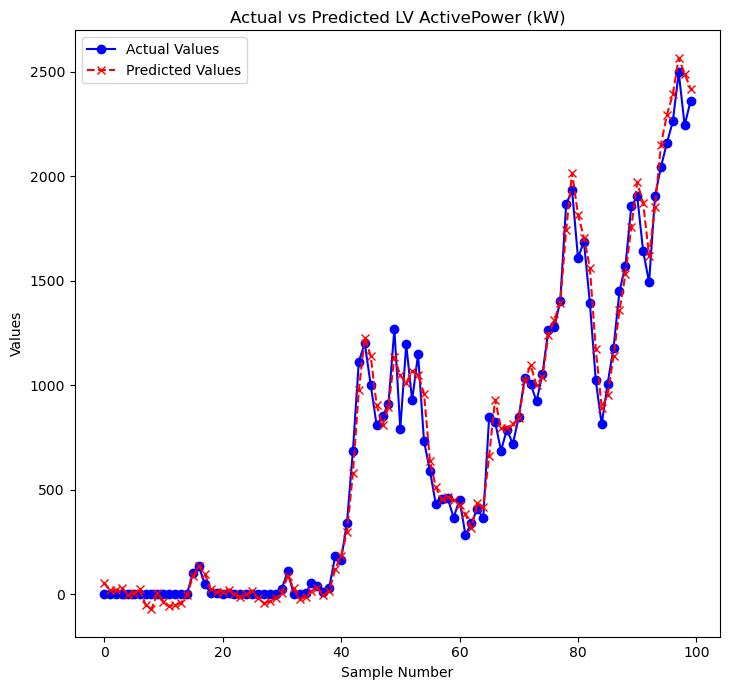

In [40]:
# Limit to the first 100 values
y_test_limited = y_test.head(100)
y_test_pred_limited = y_test_pred.head(100)

# Create a range for sample numbers (0 to 99)
sample_numbers = np.arange(len(y_test_limited))

plt.figure(figsize=(14, 7))

# Line plot of the actual values
plt.subplot(1, 2, 1)
plt.plot(sample_numbers, y_test_limited, color='blue', label='Actual Values', linestyle='-', marker='o')
plt.plot(sample_numbers, y_test_pred_limited, color='red', label='Predicted Values', linestyle='--', marker='x')
plt.xlabel('Sample Number')
plt.ylabel('Values')
plt.title('Actual vs Predicted LV ActivePower (kW)')
plt.legend()

plt.tight_layout()
plt.show()

### 2. XGBoost Model

In [41]:
# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, objective='reg:squarederror')
xgb_model.fit(X_train_scaled, y_train_scaled)

# Predict and evaluate
xgb_predictions_scaled = xgb_model.predict(X_test_scaled)

In [42]:
# Predict on training data
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
train_error_xgb = mean_squared_error(y_train_scaled, y_train_pred_xgb)
train_error_xgb_rscore = r2_score(y_train_scaled, y_train_pred_xgb)
# Predict using the model
xgb_predictions = xgb_model.predict(X_test_scaled)

test_error_xgb = mean_squared_error(y_test_scaled, xgb_predictions_scaled)


test_error_xgb_rscore = r2_score(y_test_scaled, xgb_predictions_scaled)

print(f"Training Error: {train_error_xgb}")
print(f"Testing Error: {test_error_xgb}")

print(f"Training Error_R2score: {train_error_xgb_rscore}")
print(f"Testing Error_R2score: {test_error_xgb_rscore}")

Training Error: 0.007196219920025519
Testing Error: 0.07269481307036574
Training Error_R2score: 0.9928037800799745
Testing Error_R2score: 0.932105124594077


In [43]:
xgb_predictions = scaler_y.inverse_transform(xgb_predictions_scaled.reshape(-1, 1)).ravel()

#### XGModel has overfitting issue

In [44]:
xgb_mae = round(mean_absolute_error(y_test_scaled, xgb_predictions_scaled),2)
xgb_mse = round(mean_squared_error(y_test_scaled, xgb_predictions_scaled),2)
xgb_r2 = round(r2_score(y_test_scaled, xgb_predictions_scaled),2)
xgb_rmse=round(np.sqrt(xgb_mse),2)

print(f'Mean Absoulue Error of XGBoost Model: {xgb_mae}')
print(f'Mean Squared Error of XGBoost Model: {xgb_mse}')
print(f"R2score of XGB:{xgb_r2}")
print(f'Root Mean Square error of XGB : {xgb_rmse}')

Mean Absoulue Error of XGBoost Model: 0.12
Mean Squared Error of XGBoost Model: 0.07
R2score of XGB:0.93
Root Mean Square error of XGB : 0.26


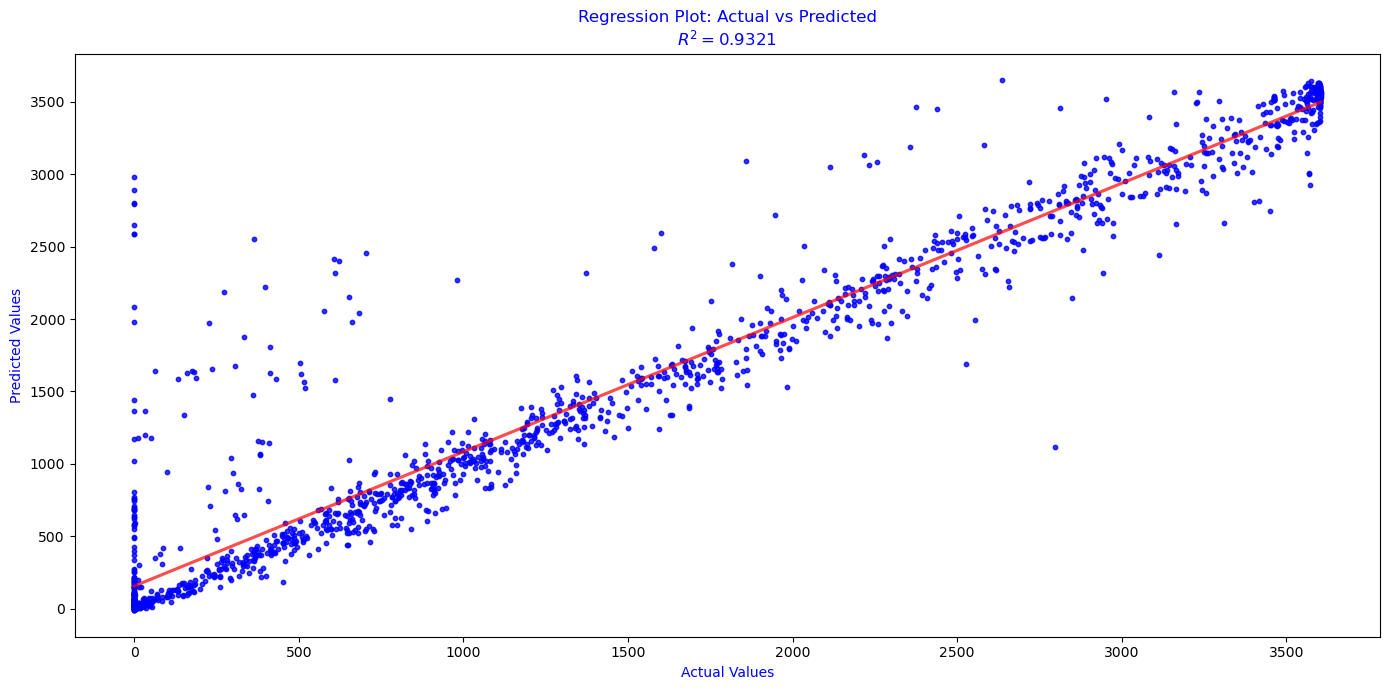

In [45]:
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': xgb_predictions
})

# Calculate R^2 value
r2 = r2_score(y_test, xgb_predictions)

plt.figure(figsize=(14, 7))

# Create the regression plot with star markers
sns.regplot(x='Actual', y='Predicted', data=df, ci=None, 
            scatter_kws={"color": "blue", "s": 10, "marker": "*"},  # Star markers
            line_kws={"color": "red", "alpha": 0.7})

# Add labels and title
plt.xlabel('Actual Values', color='blue')
plt.ylabel('Predicted Values', color='blue')
plt.title(f'Regression Plot: Actual vs Predicted\n$R^2 = {r2:.4f}$', color='blue')

plt.tight_layout()
plt.show()

In [46]:
xgb_predictions=pd.Series(xgb_predictions)

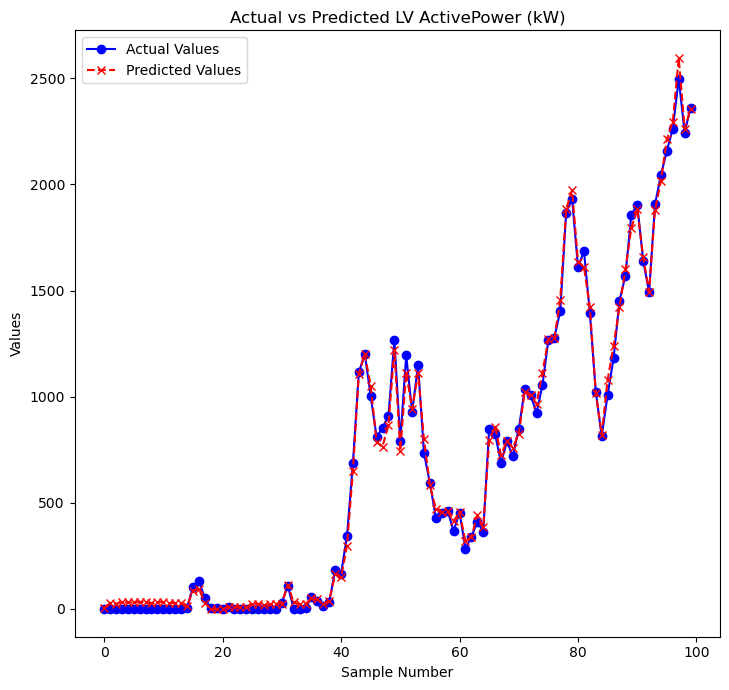

In [47]:
# Limit to the first 100 values
y_test_limited = y_test.head(100)
xgb_predictions_limited = xgb_predictions.head(100)

# Create a range for sample numbers (0 to 99)
sample_numbers = np.arange(len(y_test_limited))

plt.figure(figsize=(14, 7))

# Line plot of the actual values
plt.subplot(1, 2, 1)
plt.plot(sample_numbers, y_test_limited, color='blue', label='Actual Values', linestyle='-', marker='o')
plt.plot(sample_numbers, xgb_predictions_limited, color='red', label='Predicted Values', linestyle='--', marker='x')
plt.xlabel('Sample Number')
plt.ylabel('Values')
plt.title('Actual vs Predicted LV ActivePower (kW)')
plt.legend()

plt.tight_layout()
plt.show()

## XGboost with Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline

In [49]:
X = np.array(X)  # Convert to NumPy arrays if they are not already
y = np.array(y)

# Initialize scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Reshape y to be a 2D column vector
y_reshaped = y.reshape(-1, 1)

# Fit and transform the features and target variable
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y_reshaped).ravel() 

In [50]:


# Pipeline for scaling features and model training
pipeline = Pipeline([
    ('scaler_X', scaler_X),  # Feature scaling
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, objective='reg:squarederror'))
])


# Perform cross-validation with scaled features and target
cv_mse = cross_val_score(pipeline, X_scaled, y_scaled, cv=10, scoring='neg_mean_squared_error')

cv_mae = cross_val_score(pipeline, X_scaled, y_scaled, cv=10, scoring='neg_mean_absolute_error')

cv_r2scores = cross_val_score(pipeline, X_scaled, y_scaled, cv=10)

# Convert negative MSE to positive MSE
cv_mse = -cv_mse
# Convert negative MSE to positive MSE
cv_mae= -cv_mae


mse_cv_score = round(np.mean(cv_mse),2)
mae_cv_score = round(np.mean(cv_mae),2)
r2_cv_score=round(np.mean(cv_r2scores),2)
average_rmse = round((np.sqrt(mse_cv_score)),2)


print(f"Average 10-Fold CV R2 score  : {r2_cv_score}")
print("Average 10-Fold CV RMSE Score: {}".format(round(average_rmse,2)))
print(f"Average 10-Fold CV Mean Sqaure error (MSE): {mse_cv_score}")
print(f"Average 10-Fold CV Mean absolute error  : {mae_cv_score}")





Average 10-Fold CV R2 score  : 0.96
Average 10-Fold CV RMSE Score: 0.2
Average 10-Fold CV Mean Sqaure error (MSE): 0.04
Average 10-Fold CV Mean absolute error  : 0.08


In [51]:
predictions_cv_scaled=cross_val_predict(pipeline,X_scaled,y_scaled,cv=10)

In [52]:
predictions_cv=scaler_y.inverse_transform(predictions_cv_scaled.reshape(-1,1)).ravel()

In [57]:

# #Path
model_save_path = 'best_xgboost_model_CV_0.9633.h5'

# model_1.save(model_save_path)
print(f"Model saved to {model_save_path} with R² Score: 0.9633")

Model saved to best_xgboost_model_CV_0.9633.h5 with R² Score: 0.9633


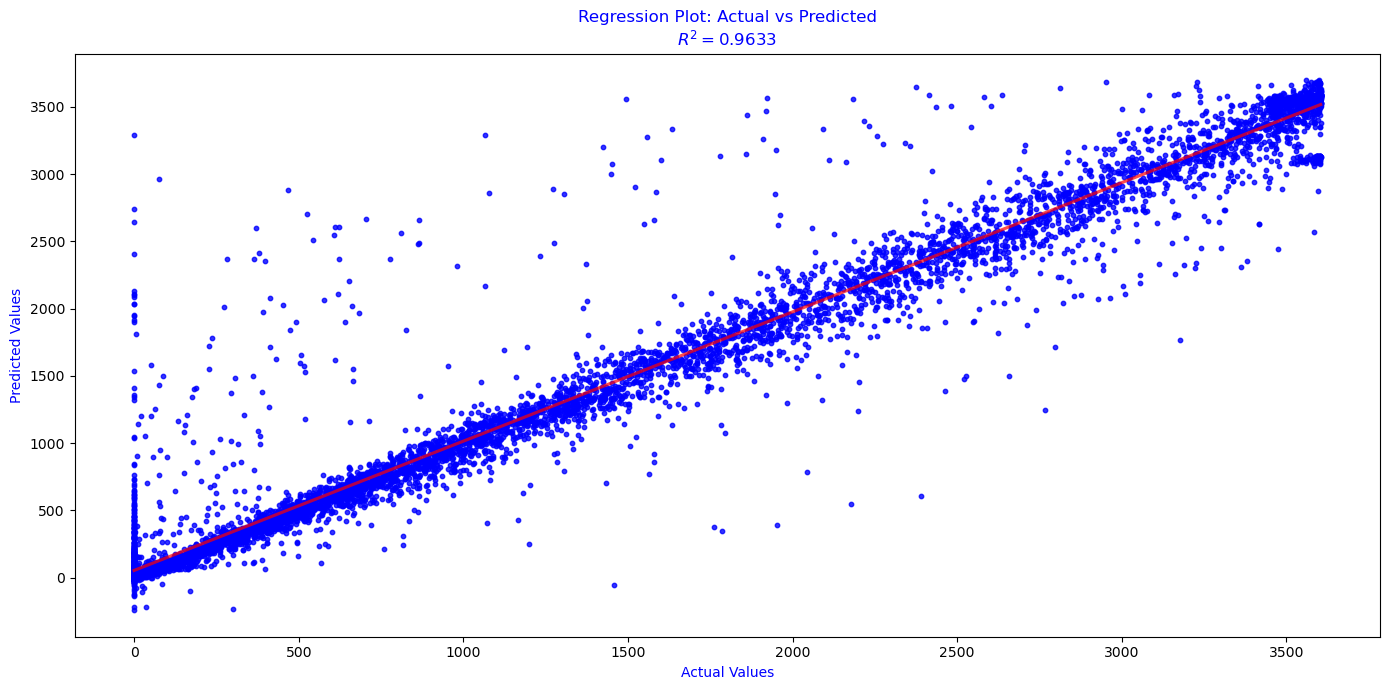

In [53]:


# Ensure y_test and predictions_cv are numpy arrays or lists
y=pd.Series(y)
y = y.reset_index(drop=True)
predictions_cv = pd.Series(predictions_cv).reset_index(drop=True)

df = pd.DataFrame({
    'Actual': y,
    'Predicted': predictions_cv
})

# Calculate R^2 value
r2 = r2_score(y, predictions_cv)

plt.figure(figsize=(14, 7))

# Create the regression plot with star markers
sns.regplot(x='Actual', y='Predicted', data=df, ci=None, 
            scatter_kws={"color": "blue", "s": 10, "marker": "*"},  # Star markers
            line_kws={"color": "red", "alpha": 0.7})

# Add labels and title
plt.xlabel('Actual Values', color='blue')
plt.ylabel('Predicted Values', color='blue')
plt.title(f'Regression Plot: Actual vs Predicted\n$R^2 = {r2:.4f}$', color='blue')

plt.tight_layout()
plt.show()

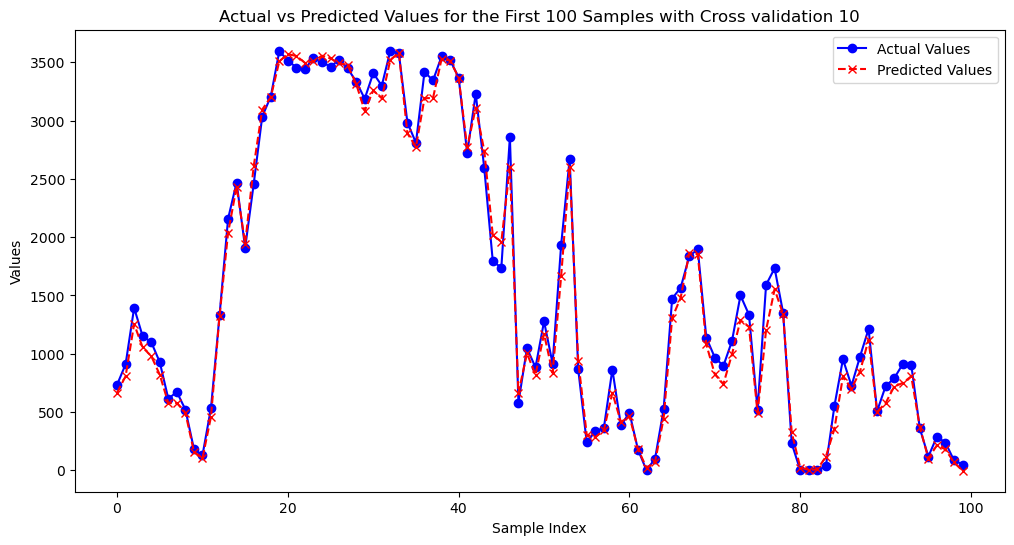

In [54]:
# Take the first 100 samples
n_samples = 100
actual_values = y[:n_samples]
predicted_values = predictions_cv[:n_samples]

# Create a plot
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(n_samples), actual_values, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(range(n_samples), predicted_values, label='Predicted Values', color='red', linestyle='--', marker='x')

# Add titles and labels
plt.title('Actual vs Predicted Values for the First 100 Samples with Cross validation 10')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

   Improvement of MAE using following steps

Hyper parameter tuning for XGBoost and Random Forest models - Ensemble Method

In [55]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV


In [56]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_xgb = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror'), param_grid=param_grid_xgb, cv=3, scoring='neg_mean_absolute_error')
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=3, scoring='neg_mean_absolute_error')

grid_search_xgb.fit(X_train_scaled, y_train_scaled)
grid_search_rf.fit(X_train_scaled, y_train_scaled)

best_xgb = grid_search_xgb.best_estimator_
best_rf = grid_search_rf.best_estimator_

KeyboardInterrupt: 

In [ ]:
ensemble_model = VotingRegressor(estimators=[('xgb', best_xgb), ('rf', best_rf)])
ensemble_model.fit(X_train_scaled, y_train_scaled)
ensemble_predictions_scaled = ensemble_model.predict(X_test_scaled)
ensemble_predictions=scaler_y.inverse_transform(ensemble_predictions_scaled.reshape(-1,1)).ravel()


In [ ]:
ensemble_mae = round(mean_absolute_error(y_test_scaled, ensemble_predictions_scaled),2)
ensemble_mse = round(mean_squared_error(y_test_scaled, ensemble_predictions_scaled),2)
ensemble_r2 = round(r2_score(y_test_scaled, ensemble_predictions_scaled),2)
ensemble_rmse=round(np.sqrt(ensemble_mse),2)


print(f"R2score of emsemble:{ensemble_r2}")
print(f'Root Mean Square error of ensemble : {ensemble_rmse}')
print(f'Mean Absoulue Error of ensemble Model: {ensemble_mae}')
print(f'Mean Squared Error of ensemble Model: {ensemble_mse}')

R2score of emsemble:0.95
Root Mean Square error of ensemble : 0.22
Mean Absoulue Error of ensemble Model: 0.11
Mean Squared Error of ensemble Model: 0.05


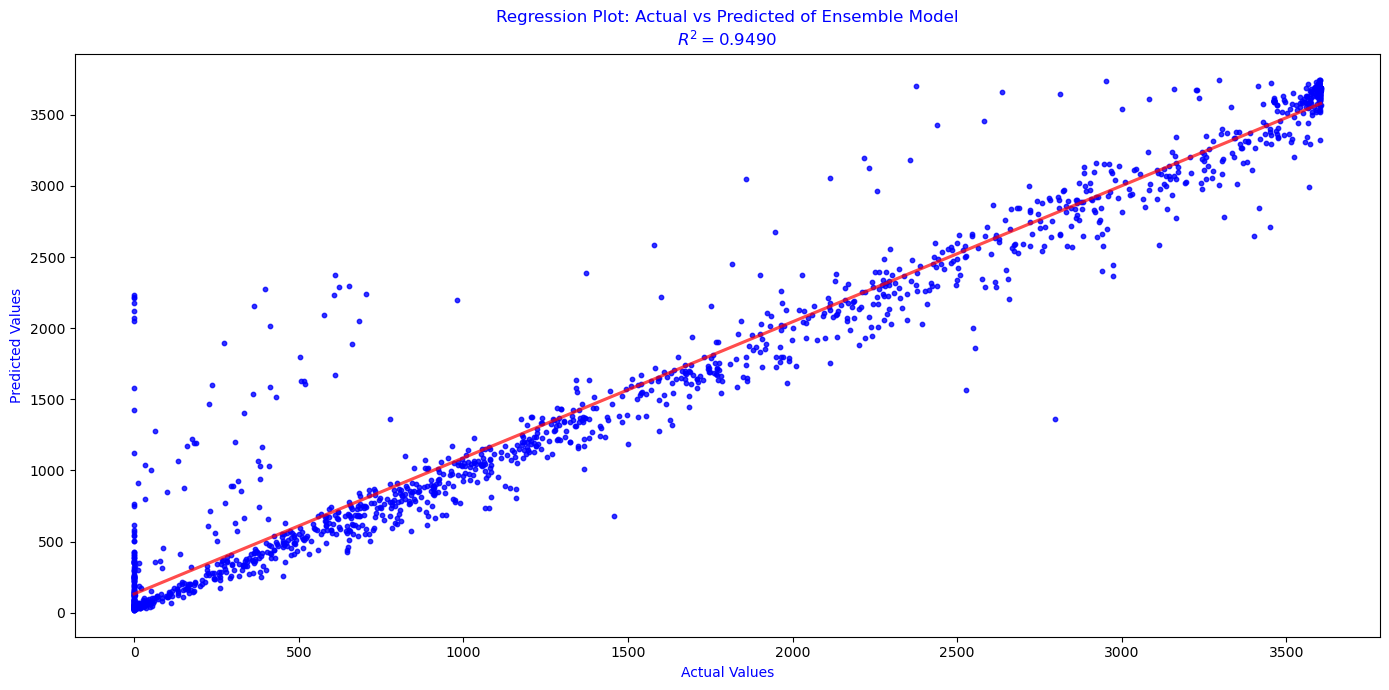

In [ ]:
 # Create DataFrame with reset index
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': ensemble_predictions
})




# Calculate R^2 value
r2 = r2_score(y_test, ensemble_predictions)

plt.figure(figsize=(14, 7))

# Create the regression plot with star markers
sns.regplot(x='Actual', y='Predicted', data=df, ci=None, 
            scatter_kws={"color": "blue", "s": 10, "marker": "*"},  # Star markers
            line_kws={"color": "red", "alpha": 0.7})

# Add labels and title
plt.xlabel('Actual Values', color='blue')
plt.ylabel('Predicted Values', color='blue')
plt.title(f'Regression Plot: Actual vs Predicted of Ensemble Model\n$R^2 = {r2:.4f}$', color='blue')

plt.tight_layout()
plt.show()

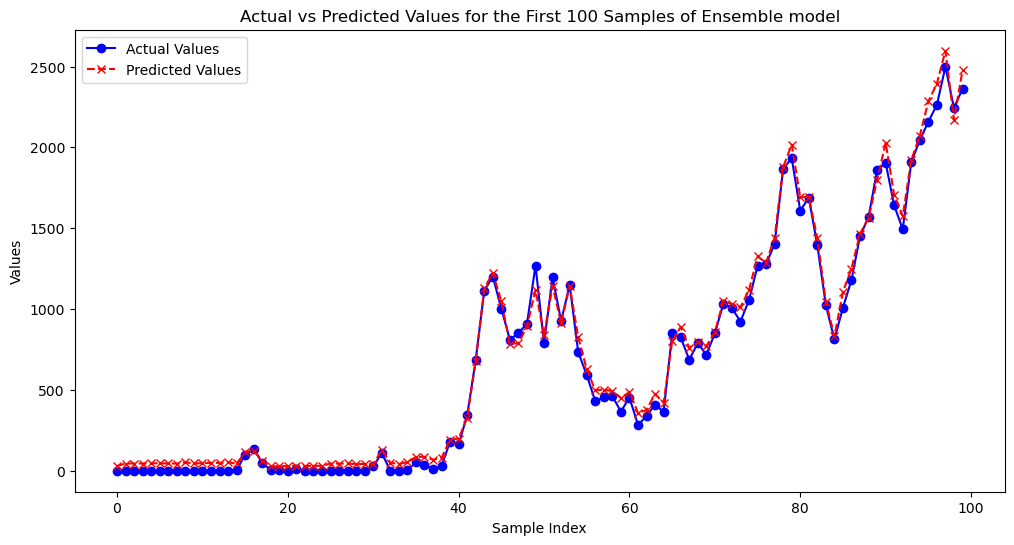

In [ ]:
# Take the first 100 samples
n_samples = 100
actual_values = y_test[:n_samples]
predicted_values = ensemble_predictions[:n_samples]

# Create a plot
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(n_samples), actual_values, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(range(n_samples), predicted_values, label='Predicted Values', color='red', linestyle='--', marker='x')

# Add titles and labels
plt.title('Actual vs Predicted Values for the First 100 Samples of Ensemble model')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
model_comparison = {
    'Model': [
        'Linear Regression', 
        'XG_Boost', 
        'PipeLine with CV', 
        'Ensemble method'
    ],
    
    'R2' : [LR_r2,xgb_r2,r2_cv_score,ensemble_r2],
    'RMSE':[LR_rmse,xgb_rmse,average_rmse,ensemble_rmse],
    'MSE': [LR_mse,xgb_mse, mse_cv_score,ensemble_mse],
    'MAE': [LR_mae, xgb_mae, mae_cv_score,ensemble_mae]
    }

comparison_df = pd.DataFrame(model_comparison)
print(comparison_df)

               Model    R2  RMSE   MSE   MAE
0  Linear Regression  0.95  0.24  0.06  0.14
1           XG_Boost  0.93  0.26  0.07  0.12
2   PipeLine with CV  0.96  0.20  0.04  0.08
3    Ensemble method  0.95  0.22  0.05  0.11


## ANN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
# import random

# seed = 42
# np.random.seed(seed)
# random.seed(seed)
# tf.random.set_seed(seed)
# Model 1: Single hidden layer
# model_1 = Sequential()
# model_1.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
# model_1.add(Dense(1, activation='linear'))

# # Compile the model
# model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])



# # Train the model
# history_1 = model_1.fit(X_train_scaled, y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# # Evaluate the model
# y_pred_1_scaled = model_1.predict(X_test_scaled)
# mse_1 = mean_squared_error(y_test_scaled, y_pred_1_scaled)
# mae_1 = mean_absolute_error(y_test_scaled, y_pred_1_scaled)
# r2_1 = r2_score(y_test_scaled, y_pred_1_scaled)
# rmse_1=np.sqrt(mse_1)
# print(f"Model 1 (Single Hidden Layer) MSE: {mse_1}")
# print(f"Model 1 (Single Hidden Layer) MAE: {mae_1}")
# print(f"Model 1 (Single Hidden Layer) r2: {r2_1}")
# print(f"Model 1 (Single Hidden Layer) RMSE: {rmse_1}")



In [ ]:

# #Path
# model_save_path = 'best_ann_model1_0.914.h5'

# model_1.save(model_save_path)
# print(f"Model saved to {model_save_path} with R² Score: 0.914")

In [ ]:
#  Define the path where the model is saved
model_load_path = 'best_ann_model1_0.914.h5'

#  Load the model
model_1 = tf.keras.models.load_model(model_load_path)

# Print a summary of the model architecture
model_1.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Train the model
#history_1 = model_1.fit(X_train_scaled, y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, verbose=1)(already the model is trained )

# Evaluate the model
y_pred_1_scaled = model_1.predict(X_test_scaled)
mse_1 = mean_squared_error(y_test_scaled, y_pred_1_scaled)
mae_1 = mean_absolute_error(y_test_scaled, y_pred_1_scaled)
r2_1 = r2_score(y_test_scaled, y_pred_1_scaled)
rmse_1=np.sqrt(mse_1)
print(f"Model 1 (Single Hidden Layer) MSE: {mse_1}")
print(f"Model 1 (Single Hidden Layer) MAE: {mae_1}")
print(f"Model 1 (Single Hidden Layer) r2: {r2_1}")
print(f"Model 1 (Single Hidden Layer) RMSE: {rmse_1}")


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model 1 (Single Hidden Layer) MSE: 0.09122721420421676
Model 1 (Single Hidden Layer) MAE: 0.1635442094122447
Model 1 (Single Hidden Layer) r2: 0.9147963921988583
Model 1 (Single Hidden Layer) RMSE: 0.30203843166758887


In [ ]:
y_pred_1=scaler_y.inverse_transform(y_pred_1_scaled.reshape(-1,1)).ravel()

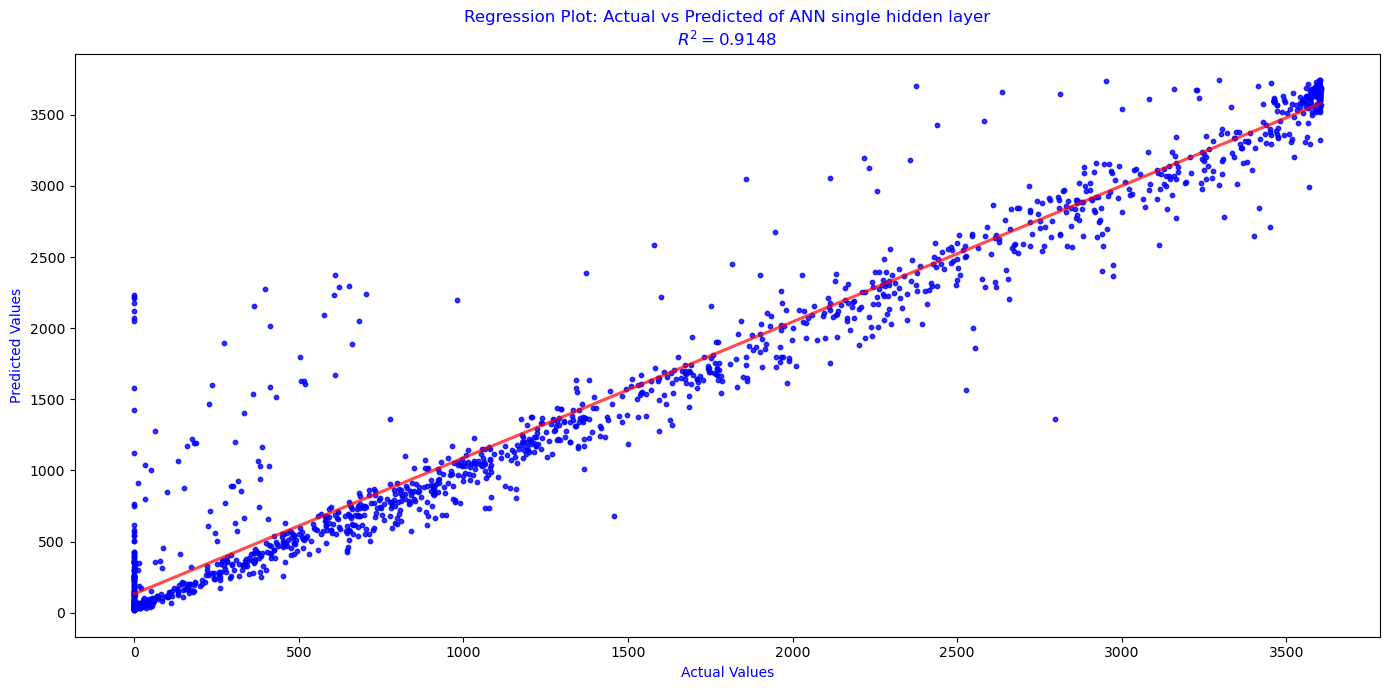

In [ ]:




# Calculate R^2 value
r2 = r2_score(y_test_scaled, y_pred_1_scaled)

plt.figure(figsize=(14, 7))

# Create the regression plot with star markers
sns.regplot(x='Actual', y='Predicted', data=df, ci=None, 
            scatter_kws={"color": "blue", "s": 10, "marker": "*"},  # Star markers
            line_kws={"color": "red", "alpha": 0.7})

# Add labels and title
plt.xlabel('Actual Values', color='blue')
plt.ylabel('Predicted Values', color='blue')
plt.title(f'Regression Plot: Actual vs Predicted of ANN single hidden layer\n$R^2 = {r2:.4f}$', color='blue')

plt.tight_layout()
plt.show()

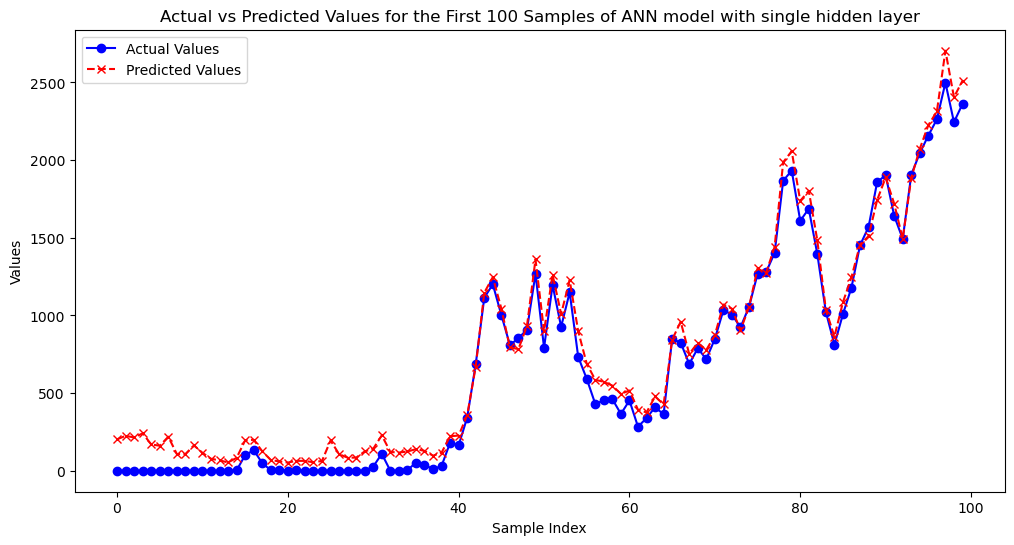

In [ ]:
# Take the first 100 samples
n_samples = 100
actual_values = y_test[:n_samples]
predicted_values = y_pred_1[:n_samples]

# Create a plot
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(n_samples), actual_values, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(range(n_samples), predicted_values, label='Predicted Values', color='red', linestyle='--', marker='x')

# Add titles and labels
plt.title('Actual vs Predicted Values for the First 100 Samples of ANN model with single hidden layer')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# # Model 2: Multiple hidden layers
# model_2 = Sequential()
# model_2.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
# model_2.add(Dense(64, activation='relu'))
# model_2.add(Dense(32, activation='relu'))
# model_2.add(Dense(16, activation='relu'))
# model_2.add(Dense(1, activation='linear'))

# # Compile the model
# model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# # Train the model
# history_2 = model_2.fit(X_train_scaled, y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# # Evaluate the model
# y_pred_2_scaled = model_2.predict(X_test_scaled)
# mse_2 = mean_squared_error(y_test_scaled, y_pred_2_scaled)
# mae_2 = mean_absolute_error(y_test_scaled, y_pred_2_scaled)
# r2_2 = r2_score(y_test_scaled, y_pred_2_scaled)
# rmse_2=np.sqrt(mse_2)
# print(f"Model 2 (Multiple Hidden Layers) MSE: {mse_2}")
# print(f"Model 2 (Multiple Hidden Layers) MAE: {mae_2}")
# print(f"Model 2 (Multiple Hidden Layer) r2: {r2_2}")
# print(f"Model 2 (Multiple Hidden Layer) RMAE: {rmse_2}")

In [ ]:
#  Define the path where the model is saved
model_load_path = 'best_ANN_Model_2_0.911.h5'

#  Load the model
model_2 = tf.keras.models.load_model(model_load_path)

# Print a summary of the model architecture
model_2.summary()

Model: "sequential_127"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_329 (Dense)               │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_330 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_331 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_332 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_333 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,907 (46.52 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Evaluate the model
y_pred_2_scaled = model_2.predict(X_test_scaled)
mse_2 = mean_squared_error(y_test_scaled, y_pred_2_scaled)
mae_2 = mean_absolute_error(y_test_scaled, y_pred_2_scaled)
r2_2 = r2_score(y_test_scaled, y_pred_2_scaled)
rmse_2=np.sqrt(mse_2)
print(f"Model 2 (Multiple Hidden Layers) MSE: {mse_2}")
print(f"Model 2 (Multiple Hidden Layers) MAE: {mae_2}")
print(f"Model 2 (Multiple Hidden Layer) r2: {r2_2}")
print(f"Model 2 (Multiple Hidden Layer) RMAE: {rmse_2}")

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 2 (Multiple Hidden Layers) MSE: 0.09517380234528411
Model 2 (Multiple Hidden Layers) MAE: 0.17012812593015525
Model 2 (Multiple Hidden Layer) r2: 0.9111103917980197
Model 2 (Multiple Hidden Layer) RMAE: 0.308502515946441


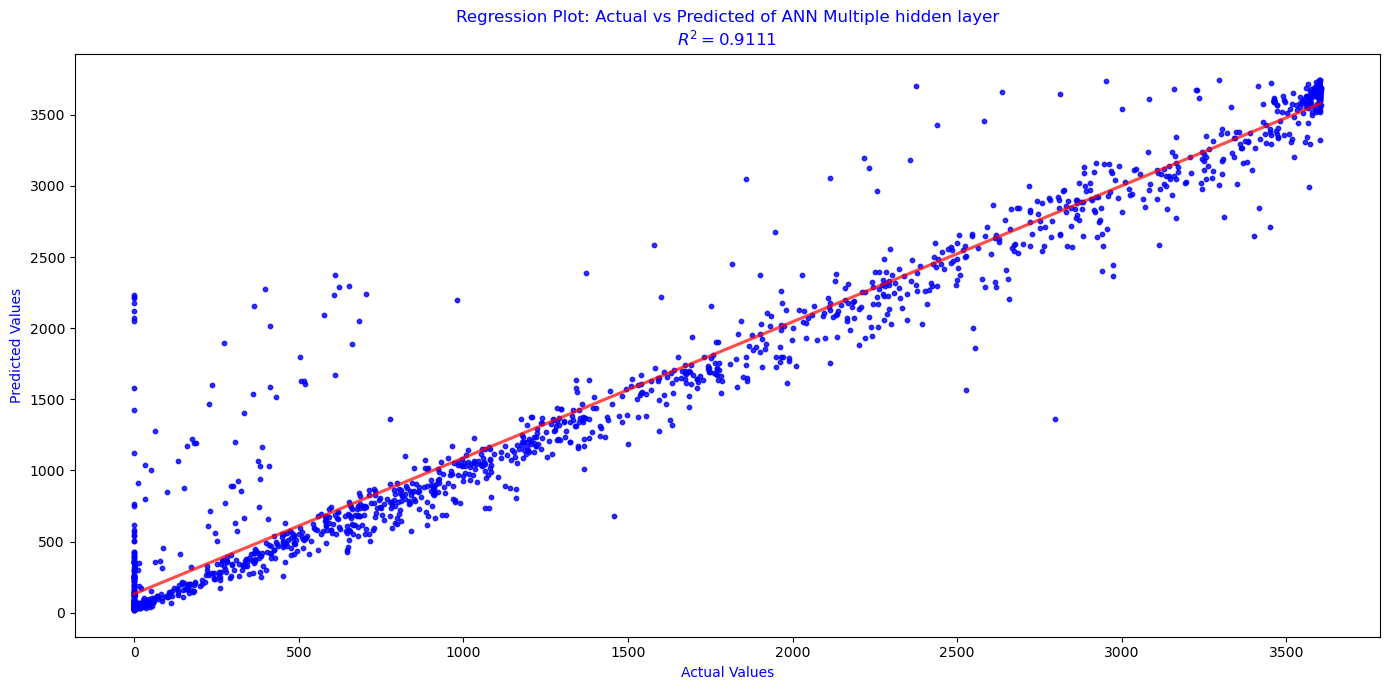

In [ ]:
# Calculate R^2 value
r2 = r2_score(y_test_scaled, y_pred_2_scaled)

plt.figure(figsize=(14, 7))

# Create the regression plot with star markers
sns.regplot(x='Actual', y='Predicted', data=df, ci=None, 
            scatter_kws={"color": "blue", "s": 10, "marker": "*"},  # Star markers
            line_kws={"color": "red", "alpha": 0.7})

# Add labels and title
plt.xlabel('Actual Values', color='blue')
plt.ylabel('Predicted Values', color='blue')
plt.title(f'Regression Plot: Actual vs Predicted of ANN Multiple hidden layer\n$R^2 = {r2:.4f}$', color='blue')

plt.tight_layout()
plt.show()

In [ ]:
y_pred_2=scaler_y.inverse_transform(y_pred_2_scaled.reshape(-1,1)).ravel()

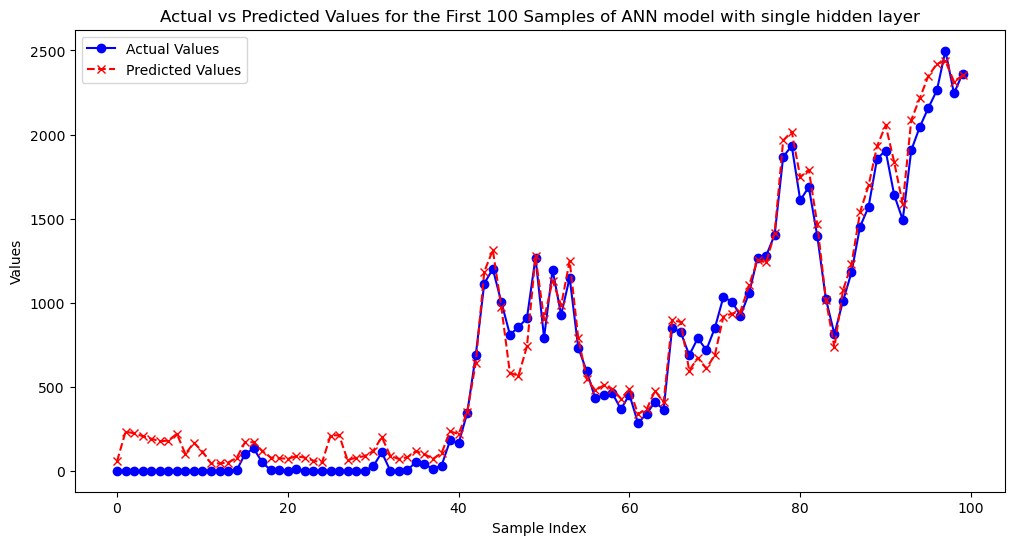

In [ ]:
# Take the first 100 samples
n_samples = 100
actual_values = y_test[:n_samples]
predicted_values = y_pred_2[:n_samples]

# Create a plot
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(n_samples), actual_values, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(range(n_samples), predicted_values, label='Predicted Values', color='red', linestyle='--', marker='x')

# Add titles and labels
plt.title('Actual vs Predicted Values for the First 100 Samples of ANN model with single hidden layer')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

### Model Performance Comparisons

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Input
import tensorflow as tf

import random

seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)



# Initialize the scaler
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Scale the X data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale the y data
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))



In [ ]:
# Reshape the X data for LSTM
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

c:\Users\joths\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:


# Define the path where you want to save the model
#model_save_path = 'best_lstm_model_0.91.h5'

# Assuming 'model' is your trained LSTM model
#model.save(model_save_path)
#print(f"Model saved to {model_save_path} with R² Score: 0.91")


In [ ]:
# # Define the path where the model is saved
# model_load_path = 'best_lstm_model_0.91.h5'

# # Load the model
# model = tf.keras.models.load_model(model_load_path)

# # Print a summary of the model architecture
# model.summary()

In [ ]:
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_scaled), verbose=1)


Epoch 1/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0866 - val_loss: 0.0070
Epoch 2/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0068 - val_loss: 0.0067
Epoch 3/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0060 - val_loss: 0.0067
Epoch 4/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0058 - val_loss: 0.0064
Epoch 5/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0056 - val_loss: 0.0062
Epoch 6/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0054 - val_loss: 0.0067
Epoch 7/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0051 - val_loss: 0.0079
Epoch 8/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0047 - val_loss: 0.0095
Epoch 9/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0044 - val_loss: 0.0112
Epoch 10/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0041 - val_loss: 0.0126
Epoch 11/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0039 - val_loss: 0.0132
Epoch 12/100
211/211 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate on test data
test_loss = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Test Loss: {test_loss}')


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046  
Test Loss: 0.010866920463740826


In [ ]:
predictions_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to original scale
predictions = scaler_y.inverse_transform(predictions_scaled)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [ ]:
# Flatten predictions to a list
predictions = predictions.flatten().tolist()
y_test_actual = y_test.values.flatten().tolist()


In [ ]:
results_df = pd.DataFrame({
    'Actual Values': y_test_actual,
    'Predicted Values': predictions
})

# Display the DataFrame
print(results_df.head()) 

   Actual Values  Predicted Values
0            0.0        -23.297598
1            0.0        -17.297556
2            0.0        -13.987960
3            0.0         -9.551268
4            0.0        -32.179886


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae_lstm = round(mean_absolute_error(y_test_scaled, predictions_scaled),2)
mse_lstm = round(mean_squared_error(y_test_scaled, predictions_scaled),2)
rmse_lstm = round(np.sqrt(mse_lstm),2)
r2_lstm = round(r2_score(y_test_scaled, predictions_scaled),2)

print(f"Mean Absolute Error (MAE) of LSTM model is : {mae_lstm}")
print(f"Mean Squared Error (MSE) of LSTM model is: {mse_lstm}")
print(f"Root Mean Squared Error (RMSE) of LSTM model is: {rmse_lstm}")
print(f"R² Score of LSTM model is: {r2_lstm}")


Mean Absolute Error (MAE) of LSTM model is : 0.05
Mean Squared Error (MSE) of LSTM model is: 0.01
Root Mean Squared Error (RMSE) of LSTM model is: 0.1
R² Score of LSTM model is: 0.92


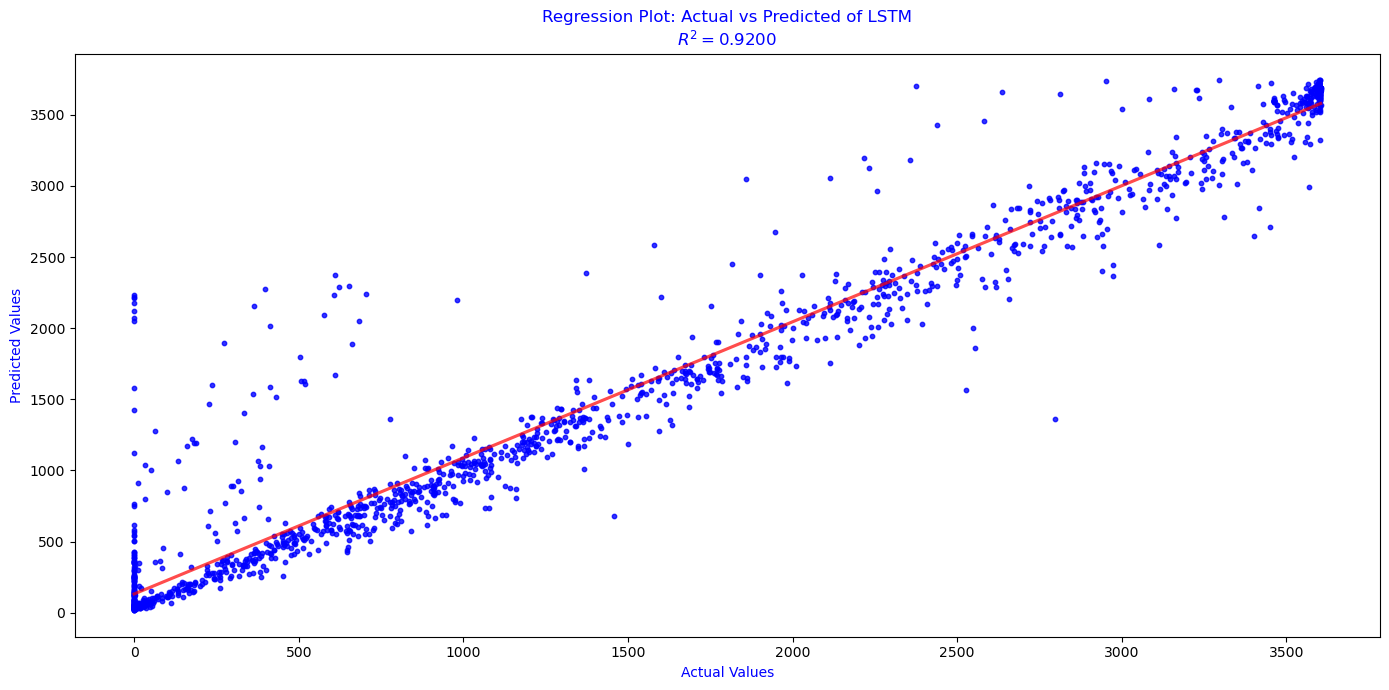

In [ ]:

# Calculate R^2 value
r2 = round(r2_score(y_test_scaled, predictions_scaled),2)

plt.figure(figsize=(14, 7))

# Create the regression plot with star markers
sns.regplot(x='Actual', y='Predicted', data=df, ci=None, 
            scatter_kws={"color": "blue", "s": 10, "marker": "*"},  # Star markers
            line_kws={"color": "red", "alpha": 0.7})

# Add labels and title
plt.xlabel('Actual Values', color='blue')
plt.ylabel('Predicted Values', color='blue')
plt.title(f'Regression Plot: Actual vs Predicted of LSTM\n$R^2 = {r2:.4f}$', color='blue')

plt.tight_layout()
plt.show()

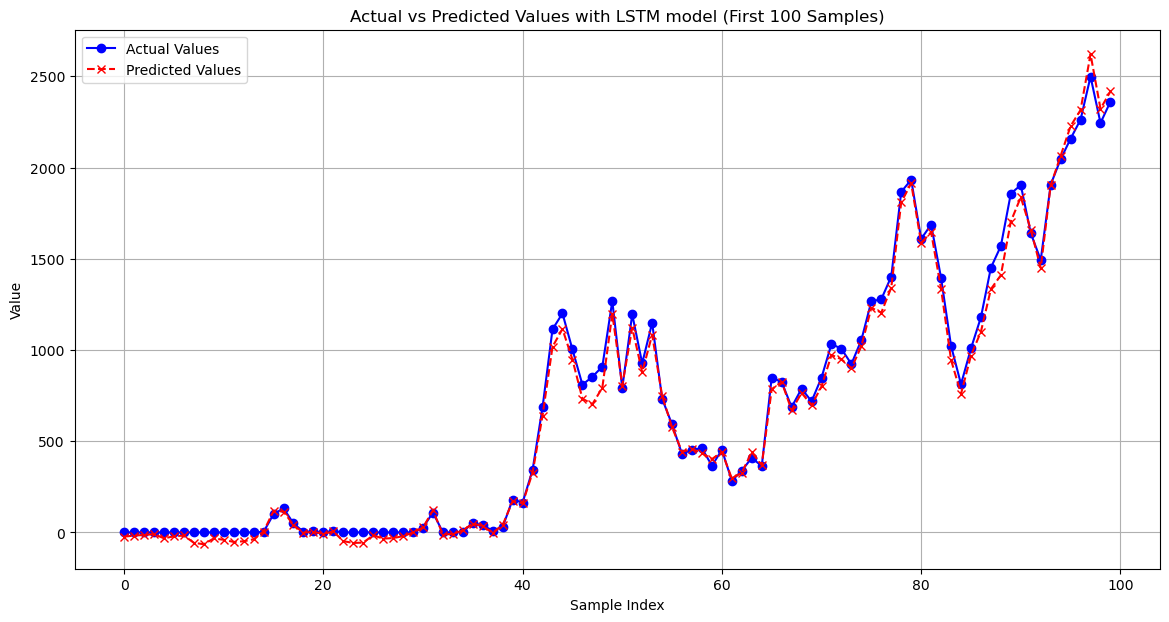

In [ ]:
import matplotlib.pyplot as plt



# Create a DataFrame for the first 100 samples
results_df = pd.DataFrame({
    'Actual Values': y_test_actual[:100],
    'Predicted Values': predictions[:100]
})

# Plotting the actual vs predicted values for the first 100 samples
plt.figure(figsize=(14, 7)) 
plt.plot(results_df.index, results_df['Actual Values'], label='Actual Values', color='blue', linestyle='-', marker='o')
plt.plot(results_df.index, results_df['Predicted Values'], label='Predicted Values', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Values with LSTM model (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Model Performance comparison

In [ ]:
model_comparison = {
    'Model': [
        'Linear Regression', 
        'XG_Boost', 
        'PipeLine with CV', 
        'Ensemble method'
    ],
    
    'R2' : [LR_r2,xgb_r2,r2_cv_score,ensemble_r2],
    'RMSE':[LR_rmse,xgb_rmse,average_rmse,ensemble_rmse],
    'MSE': [LR_mse,xgb_mse, mse_cv_score,ensemble_mse],
    'MAE': [LR_mae, xgb_mae, mae_cv_score,ensemble_mae]
    }

comparison_df = pd.DataFrame(model_comparison)
print(comparison_df)

               Model    R2  RMSE   MSE   MAE
0  Linear Regression  0.95  0.24  0.06  0.14
1           XG_Boost  0.93  0.26  0.07  0.12
2   PipeLine with CV  0.96  0.20  0.04  0.08
3    Ensemble method  0.95  0.22  0.05  0.11


In [ ]:
model_comparison = {
    'Model': [
        'ANN Single Hidden Layer', 
        'ANN Multiple Hidden Layers',
        'LSTM'
    ],
    'R2' :[r2_1,r2_2,r2_lstm],
    'RMSE':[rmse_1,rmse_2,rmse_lstm],
    'MSE': [mse_1, mse_2,mse_lstm],
    'MAE': [mae_1, mae_2,mae_lstm]
}

comparison_df = pd.DataFrame(model_comparison)
print(comparison_df)


                        Model        R2      RMSE       MSE       MAE
0     ANN Single Hidden Layer  0.914796  0.302038  0.091227  0.163544
1  ANN Multiple Hidden Layers  0.911110  0.308503  0.095174  0.170128
2                        LSTM  0.920000  0.100000  0.010000  0.050000
